<a href="https://colab.research.google.com/github/AlexMattyou/AI/blob/main/HackerEarth/Regression-Analysis/Predict-the-lowest-price.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing basic modules

In [70]:
#link given train and test data
train = pd.read_csv('https://data.alexmattyou.repl.co/db/Predict-the-lowest-price/Train.csv')
test = pd.read_csv('https://data.alexmattyou.repl.co/db/Predict-the-lowest-price/Test.csv')
print("The train data has",train.shape)
print(train.info())

The train data has (9798, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item_Id           9798 non-null   object 
 1   Date              9798 non-null   object 
 2   State_of_Country  9798 non-null   int64  
 3   Market_Category   9798 non-null   int64  
 4   Product_Category  9798 non-null   int64  
 5   Grade             9798 non-null   int64  
 6   Demand            9798 non-null   float64
 7   Low_Cap_Price     9798 non-null   int64  
 8   High_Cap_Price    9798 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 689.0+ KB
None


In [71]:
train.isnull().sum()
# wow no null values

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64

In [72]:
train['year'] = pd.DatetimeIndex(train['Date']).year
train['month'] = pd.DatetimeIndex(train['Date']).month
train.drop(columns=['Item_Id','Date','State_of_Country','Demand'],inplace=True)

In [73]:
train.corr()

,Market_Category,Product_Category,Grade,Low_Cap_Price,High_Cap_Price,year,month
Market_Category,1.000000,-0.030353,-0.034454,0.198524,0.144557,-0.190729,0.115828
Product_Category,-0.030353,1.000000,-0.056394,0.180240,0.114415,-0.062602,0.041560
Grade,-0.034454,-0.056394,1.000000,-0.079639,0.171083,0.046044,-0.031837
Low_Cap_Price,0.198524,0.180240,-0.079639,1.000000,0.721021,0.001937,0.281381
High_Cap_Price,0.144557,0.114415,0.171083,0.721021,1.000000,0.151970,0.156869
year,-0.190729,-0.062602,0.046044,0.001937,0.151970,1.000000,-0.449247
month,0.115828,0.041560,-0.031837,0.281381,0.156869,-0.449247,1.000000


In [74]:
for x in train.columns: # class features to encode
    if train[x].dtype == 'object':
      print(train[x].value_counts())
      print()
# no object data so no need to encode

In [75]:
# Time to train the model
y = train['High_Cap_Price']
del train['High_Cap_Price']
x = train
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

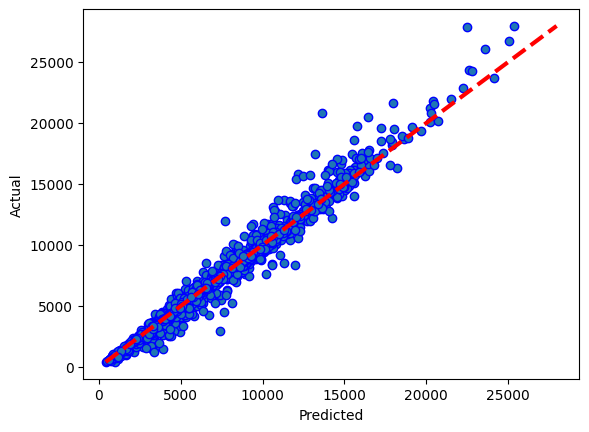

In [76]:
# using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
alg = RandomForestRegressor(n_estimators = 100, random_state = 7)
alg.fit(x, y)

y_predicted = alg.predict(x_test) # trained model
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [77]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set\n--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2)) # got 93.21% of accuracy
# good but not best

The model performance for testing set
--------------------------------------
MAE is 312.4205548688047
MSE is 341933.32660434744
R2 score is 0.9758581787036602


In [78]:
# gonna find out values for test
print("The test data has",test.shape)
print(test.isnull().sum())

The test data has (5763, 8)
Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
High_Cap_Price      0
dtype: int64


In [79]:
id = pd.DataFrame(test.Item_Id.copy(),columns=['Item_Id']) # extracting id

test['year'] = pd.DatetimeIndex(test['Date']).year
test['month'] = pd.DatetimeIndex(test['Date']).month
test.drop(columns=['Item_Id','Date','State_of_Country','Demand'],inplace=True)

In [80]:
Low_Cap_Price = pd.DataFrame(alg.predict(test),columns=['Low_Cap_Price'])
#applying the model for test dataset to predict Burn_Rate

#merge id and target for submition
output = pd.concat([id, Low_Cap_Price], axis=1)
output

c:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- High_Cap_Price
Feature names seen at fit time, yet now missing:
- Low_Cap_Price

  warnings.warn(message, FutureWarning)


,Item_Id,Low_Cap_Price
0,IT_265079,11773.223333
1,IT_265087,17222.260000
2,IT_265107,24314.230000
3,IT_265139,24254.320000
4,IT_265142,11789.200000
...,...,...
5758,IT_361691,17489.280000
5759,IT_361694,16194.650000
5760,IT_361699,15624.090000
5761,IT_361719,11421.000000


In [ ]:
output.to_csv(r'D:/Data/csv-Output/Result.csv', index=False)